Elaborado com o Notebook Python Google Colab

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Databases"

 00001a10000.csv   80001a90000.csv
 10001a20000.csv   90001a100000.csv
 20001a30000.csv  'Arvore Piratininga 2017.xlsx'
 30001a40000.csv   blogset-br.csv.gz
 40001a50000.csv  'Dataset TCC - V0.csv'
 50001a60000.csv   imdb-reviews-pt-br.csv
 60001a70000.csv   NoThemeTweets.csv
 70001a80000.csv  'Sentiment Analysis Dataset.csv'


In [ ]:
import pandas as pd

dados = pd.read_csv("/content/drive/My Drive/Databases/NoThemeTweets.csv")

In [ ]:
dados

,id,tweet_text,tweet_date,sentiment,query_used
0,1031761728445530112,@Tixaa23 14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,:)
1,1031761040462278656,@drexalvarez O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,:)
2,1031760962372689920,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,:)
3,1031760948250456066,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,:)
4,1031760895985246208,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Tue Aug 21 04:32:21 +0000 2018,Positivo,:)
...,...,...,...,...,...
785809,1050705141207367680,Acordar 8 horas é tão bom :),Fri Oct 12 11:10:01 +0000 2018,Positivo,:)
785810,1050706655049109504,"@mayckcunha Olá, Mayck. Você já é cliente Clar...",Fri Oct 12 11:16:02 +0000 2018,Positivo,:)
785811,1050705846907392005,Opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,Positivo,:)
785812,1050705490232127489,@andrebraga2806 Foi como a tua lealdade :),Fri Oct 12 11:11:24 +0000 2018,Positivo,:)


In [ ]:
classificacao = dados["sentiment"].replace(["Negativo","Positivo"],[0,1])

In [ ]:
dados["classificacao"] = classificacao

In [ ]:
dados.groupby('classificacao').count()

,id,tweet_text,tweet_date,sentiment,query_used
classificacao,,,,,
0,522707,522707,522707,522707,522707
1,263107,263107,263107,263107,263107


In [ ]:
dados

,id,tweet_text,tweet_date,sentiment,query_used,classificacao
0,1031761728445530112,@Tixaa23 14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,:),1
1,1031761040462278656,@drexalvarez O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,:),1
2,1031760962372689920,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,:),1
3,1031760948250456066,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,:),1
4,1031760895985246208,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Tue Aug 21 04:32:21 +0000 2018,Positivo,:),1
...,...,...,...,...,...,...
785809,1050705141207367680,Acordar 8 horas é tão bom :),Fri Oct 12 11:10:01 +0000 2018,Positivo,:),1
785810,1050706655049109504,"@mayckcunha Olá, Mayck. Você já é cliente Clar...",Fri Oct 12 11:16:02 +0000 2018,Positivo,:),1
785811,1050705846907392005,Opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,Positivo,:),1
785812,1050705490232127489,@andrebraga2806 Foi como a tua lealdade :),Fri Oct 12 11:11:24 +0000 2018,Positivo,:),1


In [ ]:
import nltk
from nltk import tokenize

nltk.download('stopwords')

token_espaco = tokenize.WhitespaceTokenizer()

token_pontuacao = tokenize.WordPunctTokenizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

from string import punctuation

pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)

excluir = [":)",":(","://","https"]

pontuacao_stopwords = pontuacao + palavras_irrelevantes + excluir

frase_processada = list()
for tweet in dados.tweet_text:
  nova_frase = list()
  tweet = tweet.lower()
  palavras_texto = token_espaco.tokenize(tweet)
  for palavra in palavras_texto:
    if '@' not in palavra:
      if palavra not in pontuacao_stopwords:      
        nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

dados["tratamento_1"] = frase_processada

In [ ]:
dados.head()

,id,tweet_text,tweet_date,sentiment,query_used,classificacao,tratamento_1
0,1031761728445530112,@Tixaa23 14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,:),1,14 ir
1,1031761040462278656,@drexalvarez O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,:),1,like dei época
2,1031760962372689920,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,:),1,queria conseguir comer alguma coisa pra poder ...
3,1031760948250456066,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,:),1,:d lindo dia
4,1031760895985246208,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Tue Aug 21 04:32:21 +0000 2018,Positivo,:),1,"pq pr jeito!!é ""oferta"", ha q aproveitar. :p"


In [ ]:
!pip install unidecode

     |████████████████████████████████| 245kB 4.3MB/s 


In [ ]:
import unidecode

sem_acentos = [unidecode.unidecode(tweet) for tweet in dados["tratamento_1"]]

In [ ]:
dados["tratamento_2"] = sem_acentos

In [ ]:
dados.head()

,id,tweet_text,tweet_date,sentiment,query_used,classificacao,tratamento_1,tratamento_2
0,1031761728445530112,@Tixaa23 14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,:),1,14 ir,14 ir
1,1031761040462278656,@drexalvarez O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,:),1,like dei época,like dei epoca
2,1031760962372689920,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,:),1,queria conseguir comer alguma coisa pra poder ...,queria conseguir comer alguma coisa pra poder ...
3,1031760948250456066,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,:),1,:d lindo dia,:d lindo dia
4,1031760895985246208,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Tue Aug 21 04:32:21 +0000 2018,Positivo,:),1,"pq pr jeito!!é ""oferta"", ha q aproveitar. :p","pq pr jeito!!e ""oferta"", ha q aproveitar. :p"


In [ ]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [ ]:
stemer = nltk.RSLPStemmer()

frase_processada = list()
for tweet in dados["tratamento_2"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(tweet)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(stemer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

dados["tratamento_3"] = frase_processada

In [ ]:
dados

,id,tweet_text,tweet_date,sentiment,query_used,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1031761728445530112,@Tixaa23 14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,:),1,14 ir,14 ir,14 ir
1,1031761040462278656,@drexalvarez O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,:),1,like dei época,like dei epoca,lik dei epoc
2,1031760962372689920,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,:),1,queria conseguir comer alguma coisa pra poder ...,queria conseguir comer alguma coisa pra poder ...,quer consegu com algum cois pra pod dorm
3,1031760948250456066,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,:),1,:d lindo dia,:d lindo dia,d lind dia
4,1031760895985246208,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Tue Aug 21 04:32:21 +0000 2018,Positivo,:),1,"pq pr jeito!!é ""oferta"", ha q aproveitar. :p","pq pr jeito!!e ""oferta"", ha q aproveitar. :p","pq pr jeit !! ofert "", q aprove p"
...,...,...,...,...,...,...,...,...,...
785809,1050705141207367680,Acordar 8 horas é tão bom :),Fri Oct 12 11:10:01 +0000 2018,Positivo,:),1,acordar 8 horas tão bom,acordar 8 horas tao bom,acord 8 hor tao bom
785810,1050706655049109504,"@mayckcunha Olá, Mayck. Você já é cliente Clar...",Fri Oct 12 11:16:02 +0000 2018,Positivo,:),1,"olá, mayck. cliente claro? caso seja, pode con...","ola, mayck. cliente claro? caso seja, pode con...",ola mayck client clar cas pod contrat sit po c...
785811,1050705846907392005,Opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,Positivo,:),1,opa tava merda mm fiquei logo feliz causa daquilo,opa tava merda mm fiquei logo feliz causa daquilo,opa tav merd mm fiq log feliz caus daquil
785812,1050705490232127489,@andrebraga2806 Foi como a tua lealdade :),Fri Oct 12 11:11:24 +0000 2018,Positivo,:),1,lealdade,lealdade,lealdad


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def nuvem_palavras_neg(texto, coluna_texto):  
  texto_negativo = texto.query("sentiment == 'Negativo'")
  todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
def nuvem_palavras_pos(texto, coluna_texto):  
  texto_positivo = texto.query("sentiment == 'Positivo'")
  todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
def pareto(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])

  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  df_frequencia = pd.DataFrame({"Palavra":list(frequencia.keys()),"Frequência":list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(quantidade, "Frequência")
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data= df_frequencia, x = "Palavra", y = "Frequência")
  ax.set(ylabel= "Contagem")
  plt.show()

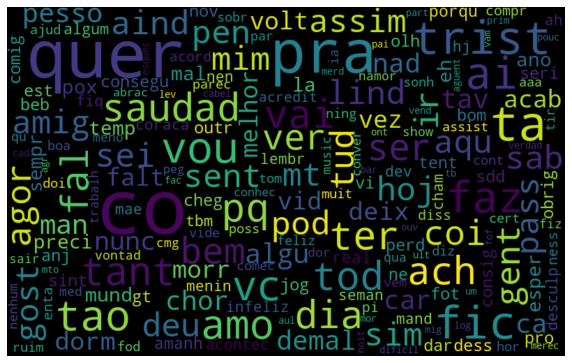

In [ ]:
nuvem_palavras_neg(dados, "tratamento_3")

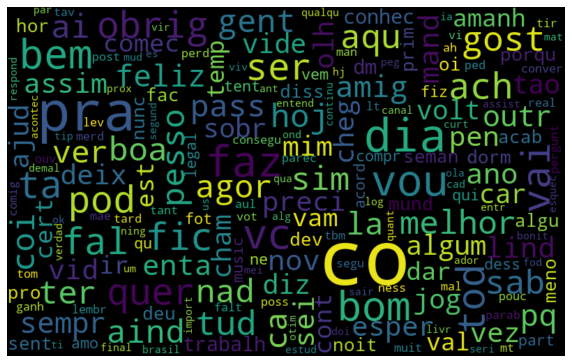

In [ ]:
nuvem_palavras_pos(dados, "tratamento_3")

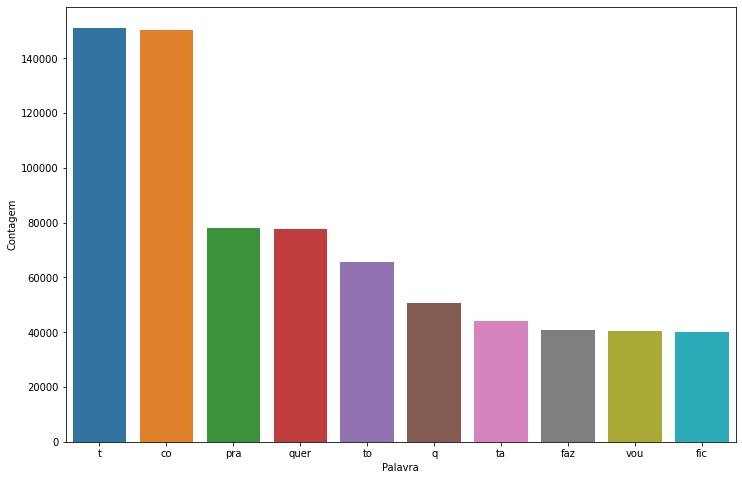

In [ ]:
pareto(dados, "tratamento_3", 10)

In [ ]:
def trata_frase(frase):
  frase_tratada = list()
  nova_frase = list()
  frase = frase.lower()
  palavras_texto = token_espaco.tokenize(frase)
  for palavra in palavras_texto:
    if '@' not in palavra:
      if palavra not in pontuacao_stopwords:      
        nova_frase.append(stemer.stem(palavra))
  frase_tratada.append(' '.join(nova_frase))
  frase_tratada = [unidecode.unidecode(frase) for frase in frase_tratada]
  
  return frase_tratada

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

tfidf1 = TfidfVectorizer(lowercase = False, max_features=50)

tfidf_bruto = tfidf1.fit_transform(dados["tweet_text"])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, dados["classificacao"], random_state=42)

regressao_logistica1 = LogisticRegression(solver = "lbfgs")

regressao_logistica1.fit(treino, classe_treino)

acuracia_tfidf_bruto = regressao_logistica1.score(teste, classe_teste)

print(acuracia_tfidf_bruto)

0.6881763669866737


In [ ]:
tfidf2 = TfidfVectorizer(lowercase = False, max_features=50)

tfidf_tratado = tfidf2.fit_transform(dados["tratamento_3"])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratado, dados["classificacao"], random_state=42)

regressao_logistica2 = LogisticRegression(solver = "lbfgs")

regressao_logistica2.fit(treino, classe_treino)

acuracia_tfidf_tratado = regressao_logistica2.score(teste, classe_teste)

print(acuracia_tfidf_tratado)

0.6885021429953068


In [ ]:
tfidf3 = TfidfVectorizer(lowercase=False,ngram_range=(1,2))

tfidf_ngrams = tfidf3.fit_transform(dados["tratamento_3"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_ngrams, dados["classificacao"], random_state=42)
regressao_logistica3 = LogisticRegression(solver = "lbfgs", max_iter=1000)
regressao_logistica3.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica3.score(teste, classe_teste)

print(acuracia_tfidf_ngrams)

0.794929092815621


In [ ]:
print(tfidf1.get_feature_names())

['Eu', 'amo', 'as', 'bem', 'co', 'com', 'da', 'de', 'dia', 'do', 'ela', 'ele', 'em', 'eu', 'https', 'isso', 'já', 'mais', 'mas', 'me', 'mesmo', 'meu', 'minha', 'muito', 'na', 'no', 'não', 'os', 'para', 'por', 'pq', 'pra', 'que', 'queria', 'se', 'ser', 'só', 'te', 'tem', 'tenho', 'ter', 'to', 'triste', 'tá', 'um', 'uma', 'vai', 'vc', 'você', 'vou']


In [ ]:
trata_frase("Faltá Frase")

['falt fras']

In [ ]:
def testa_frase(frase):
  print("Regressão 1")
  print(regressao_logistica1.predict(tfidf1.transform(trata_frase(frase))))
  print(regressao_logistica1.predict_proba(tfidf1.transform(trata_frase(frase))))
  print("Regressão 2")
  print(regressao_logistica2.predict(tfidf2.transform(trata_frase(frase))))
  print(regressao_logistica2.predict_proba(tfidf2.transform(trata_frase(frase))))
  print("Regressão 3")
  print(regressao_logistica3.predict(tfidf3.transform(trata_frase(frase))))
  print(regressao_logistica3.predict_proba(tfidf3.transform(trata_frase(frase))))

In [ ]:
testa_frase("Um dia ruim")
testa_frase("Um dia bom")

Regressão 1
[1]
[[0.36962036 0.63037964]]
Regressão 2
[1]
[[0.47902906 0.52097094]]
Regressão 3
[0]
[[0.87927611 0.12072389]]
Regressão 1
[1]
[[0.36962036 0.63037964]]
Regressão 2
[1]
[[0.22172233 0.77827767]]
Regressão 3
[1]
[[0.08002752 0.91997248]]


In [ ]:
import pickle
pickle.dump(regressao_logistica3, open('modelo.sav', 'wb'))

In [ ]:
pickle.dump(tfidf3, open("vectorizer.pickle", "wb"))

Resultados Encontrados

O treinamento sem o tratamento dos dados gerou uma taxa de acerto de 0.6881, já com o tratamento dos dados a taxa vai para 0.6885, o que não representa um ganho significativo. Utilizando-se um bigram a taxa de acerto foi de 0.7949, que representa um aumento de 15,5% com relação aos dados sem tratamento.
Foi possível observar também que a confiança do resultado é significativamente maior utilizando bigrams.